<H3>Loading libraries and creating spark context.</H3>

In [1]:
import os
import sys
import operator

from operator import add

if 'SPARK_HOME' not in os.environ:
    os.environ['SPARK_HOME'] = " C:\Spark\spark-1.6.1-bin-hadoop2.6"
    
sys.path.append("C:\Spark\spark-1.6.1-bin-hadoop2.6/python")
sys.path.append("C:\Spark\spark-1.6.1-bin-hadoop2.6/python/build")
sys.path.append("C:\Spark\spark-1.6.1-bin-hadoop2.6\python\pyspark")
sys.path.append("C:\Spark\spark-1.6.1-bin-hadoop2.6\python \lib\py4j-0.9-src.zip")
sys.path.append("C:\Spark\spark-1.6.0-bin-hadoop2.4\python\lib\pyspark.zip")
sys.path.append("C:\Spark\spark-1.6.0-bin-hadoop2.4\python\lib")

import pyspark

sc = pyspark.SparkContext('local')

<H3>Creating SQL Context.</H3>

In [2]:
from pyspark.sql import Row
from pyspark import SQLContext
sqlContext = SQLContext(sc)

<H3>Verfiy that spark is working. If it isn't working, this will throw an assertion error.</H3>

In [3]:
data = [('Alice', 1), ('Bob', 2), ('Bill', 4)]
df = sqlContext.createDataFrame(data, ['name', 'age'])
fil = df.filter(df.age > 3).collect()
print fil
assert fil == [Row(u'Bill', 4)]

[Row(name=u'Bill', age=4)]


<H3>Let's load a text file</H3>
<H4>The text file contains the [Complete Works of William Shakespeare](http://www.gutenberg.org/ebooks/100) retrieved from [Project Gutenberg](http://www.gutenberg.org/wiki/Main_Page).</H4>

In [4]:
import os.path
baseDir = os.path.join('Datasets')
inputPath = os.path.join('pg100.txt')
fileName = os.path.join(baseDir, inputPath)

<H3>Count the number of words in the text file</H3>

In [5]:
dataDF = sqlContext.read.text(fileName)
shakespeareCount = dataDF.count()
print shakespeareCount

124787


<H3>Let's check the attributes of sqlContext</H3>

In [6]:
dir(sqlContext)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_createFromLocal',
 '_createFromRDD',
 '_inferSchema',
 '_inferSchemaFromList',
 '_instantiatedContext',
 '_jsc',
 '_jvm',
 '_sc',
 '_scala_SQLContext',
 '_ssql_ctx',
 'applySchema',
 'cacheTable',
 'clearCache',
 'createDataFrame',
 'createExternalTable',
 'dropTempTable',
 'getConf',
 'getOrCreate',
 'inferSchema',
 'jsonFile',
 'jsonRDD',
 'load',
 'newSession',
 'parquetFile',
 'range',
 'read',
 'registerDataFrameAsTable',
 'registerFunction',
 'setConf',
 'sql',
 'table',
 'tableNames',
 'tables',
 'udf',
 'uncacheTable']

<H3>Use sc.version to see what version of Spark we are running</H3>

In [7]:
sc.version

u'1.6.1'

<H2>Working with your first DataFrames</H2>
<H4>In Spark, we first create a base DataFrame. We can then apply one or more transformations to that base DataFrame. A DataFrame is immutable, so once it is created, it cannot be changed. As a result, each transformation creates a new DataFrame. Finally, we can apply one or more actions to the DataFrames. Note that Spark uses lazy evaluation, so transformations are not actually executed until an action occurs.</H4>

<H3>We will use the fake-factory python library to create a collection of fake person records.</H3>

In [8]:
from faker import Factory
fake = Factory.create()
fake.seed(4321)

<H3>We're going to use this factory to create a collection of randomly generated people records.</H3> 
<H3>In the next section, we'll turn that collection into a DataFrame. We'll use the Spark Row class, because that will help us define the Spark DataFrame schema.</H3>

In [9]:
from pyspark.sql import Row
def fake_entry():
    name = fake.name().split()
    return Row(name[1], name[0], fake.ssn(), fake.job(), abs(2016 - fake.date_time().year) + 1)

In [10]:
def repeat(times, func, *args, **kwargs):
    for _ in xrange(times):
        yield func(*args, **kwargs)

In [11]:
data = list(repeat(10000, fake_entry))

<H3>The object 'data' is just a normal Python list, containing Spark SQL Row objects. Let's look at the first item in the list:</H3>

In [12]:
data[0][0], data[0][1], data[0][2], data[0][3], data[0][4]

(u'Harvey', u'Tracey', u'160-37-9051', 'Agricultural engineer', 39)

In [13]:
len(data)

10000

<H3>Let's create a dataframe</H3>

In [14]:
dataDF = sqlContext.createDataFrame(data, ('last_name', 'first_name', 'ssn', 'occupation', 'age'))

In [15]:
print 'type of dataDF: {0}'.format(type(dataDF))

type of dataDF: <class 'pyspark.sql.dataframe.DataFrame'>


<H3>Let's take a look at the DataFrame's schema</H3>

In [16]:
dataDF.printSchema()

root
 |-- last_name: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- ssn: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- age: long (nullable = true)



<H3>Let's register the newly created DataFrame as a named table, using the registerDataFrameAsTable() method.</H3>

In [17]:
sqlContext.registerDataFrameAsTable(dataDF, 'dataframe')

In [18]:
help(dataDF)

Help on DataFrame in module pyspark.sql.dataframe object:

class DataFrame(__builtin__.object)
 |  A distributed collection of data grouped into named columns.
 |  
 |  A :class:`DataFrame` is equivalent to a relational table in Spark SQL,
 |  and can be created using various functions in :class:`SQLContext`::
 |  
 |      people = sqlContext.read.parquet("...")
 |  
 |  Once created, it can be manipulated using the various domain-specific-language
 |  (DSL) functions defined in: :class:`DataFrame`, :class:`Column`.
 |  
 |  To select a column from the data frame, use the apply method::
 |  
 |      ageCol = people.age
 |  
 |  A more concrete example::
 |  
 |      # To create DataFrame using SQLContext
 |      people = sqlContext.read.parquet("...")
 |      department = sqlContext.read.parquet("...")
 |  
 |      people.filter(people.age > 30).join(department, people.deptId == department.id))           .groupBy(department.name, "gender").agg({"salary": "avg", "age": "max"})
 |  
 |  

<H3>How many partitions will the DataFrame be split into?</H3>

In [19]:
dataDF.rdd.getNumPartitions()

1

<H3>Let's add a couple transformations to our DataFrame and look at the query plan on the resulting transformed DataFrame. </H3>

In [20]:
newDF = dataDF.distinct().select('*')
newDF.explain(True)

== Parsed Logical Plan ==
'Project [*]
+- Aggregate [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], [last_name#7,first_name#8,ssn#9,occupation#10,age#11L]
   +- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapPartitionsRDD[19] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:-2

== Analyzed Logical Plan ==
last_name: string, first_name: string, ssn: string, occupation: string, age: bigint
Project [last_name#7,first_name#8,ssn#9,occupation#10,age#11L]
+- Aggregate [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], [last_name#7,first_name#8,ssn#9,occupation#10,age#11L]
   +- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapPartitionsRDD[19] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:-2

== Optimized Logical Plan ==
Aggregate [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], [last_name#7,first_name#8,ssn#9,occupation#10,age#11L]
+- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapP

<H3>Subtract one from each value using select</H3>

In [21]:
subDF = dataDF.select('last_name', 'first_name', 'ssn', 'occupation', (dataDF.age - 1).alias('age'))

<H3>Let's take a look at the query plan.</H3>

In [22]:
subDF.explain(True)

== Parsed Logical Plan ==
'Project [unresolvedalias('last_name),unresolvedalias('first_name),unresolvedalias('ssn),unresolvedalias('occupation),(age#11L - 1) AS age#12]
+- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapPartitionsRDD[19] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:-2

== Analyzed Logical Plan ==
last_name: string, first_name: string, ssn: string, occupation: string, age: bigint
Project [last_name#7,first_name#8,ssn#9,occupation#10,(age#11L - cast(1 as bigint)) AS age#12L]
+- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapPartitionsRDD[19] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:-2

== Optimized Logical Plan ==
Project [last_name#7,first_name#8,ssn#9,occupation#10,(age#11L - 1) AS age#12L]
+- LogicalRDD [last_name#7,first_name#8,ssn#9,occupation#10,age#11L], MapPartitionsRDD[19] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:-2

== Physical Plan ==
Project [last_name#7,first_name#

<H3>Use collect to view results</H3>

In [25]:
results = subDF.collect()
results1 = subDF.show(10)
#print result
print results1

+----------+----------+-----------+--------------------+---+
| last_name|first_name|        ssn|          occupation|age|
+----------+----------+-----------+--------------------+---+
|    Harvey|    Tracey|160-37-9051|Agricultural engi...| 38|
|     Green|    Isabel|361-94-4342|Teacher, primary ...| 26|
|     Lewis|     Tammy|769-27-5887|Scientific labora...| 20|
|Cunningham|  Kathleen|175-24-7915|Geophysicist/fiel...| 41|
|   Marquez|     Jorge|310-69-7326|Forensic psycholo...| 25|
|   Summers|      Beth|099-90-9730|            Best boy| 42|
|   Jessica|      Mrs.|476-06-5497|English as a fore...| 42|
|    Turner|     Diana|722-09-8354|Psychologist, pri...|  6|
|   Johnson|     David|715-56-1708|     Sales executive|  5|
|     Lewis|   Melissa|123-48-8354|Engineer, broadca...| 16|
+----------+----------+-----------+--------------------+---+
only showing top 10 rows

None


<H3>A better way to visualize the data is to use the 'show' method.</H3>

In [24]:
subDF.show()

+----------+----------+-----------+--------------------+---+
| last_name|first_name|        ssn|          occupation|age|
+----------+----------+-----------+--------------------+---+
|    Harvey|    Tracey|160-37-9051|Agricultural engi...| 38|
|     Green|    Isabel|361-94-4342|Teacher, primary ...| 26|
|     Lewis|     Tammy|769-27-5887|Scientific labora...| 20|
|Cunningham|  Kathleen|175-24-7915|Geophysicist/fiel...| 41|
|   Marquez|     Jorge|310-69-7326|Forensic psycholo...| 25|
|   Summers|      Beth|099-90-9730|            Best boy| 42|
|   Jessica|      Mrs.|476-06-5497|English as a fore...| 42|
|    Turner|     Diana|722-09-8354|Psychologist, pri...|  6|
|   Johnson|     David|715-56-1708|     Sales executive|  5|
|     Lewis|   Melissa|123-48-8354|Engineer, broadca...| 16|
| Hernandez|  Benjamin|293-22-0265|Scientist, produc...| 28|
|     Dixon| Stephanie|041-23-3263|Building control ...| 23|
|       Kim|      Leah|725-61-1132|              Artist| 42|
|    Snyder|    Leslie|2

<H3>By default 'show' displays 20 rows. If you don't want to truncate the data, you can tell it not to.</H3>

In [25]:
subDF.show(n=30, truncate=False)

+----------+----------+-----------+-------------------------------------------+---+
|last_name |first_name|ssn        |occupation                                 |age|
+----------+----------+-----------+-------------------------------------------+---+
|Harvey    |Tracey    |160-37-9051|Agricultural engineer                      |38 |
|Green     |Isabel    |361-94-4342|Teacher, primary school                    |26 |
|Lewis     |Tammy     |769-27-5887|Scientific laboratory technician           |20 |
|Cunningham|Kathleen  |175-24-7915|Geophysicist/field seismologist            |41 |
|Marquez   |Jorge     |310-69-7326|Forensic psychologist                      |25 |
|Summers   |Beth      |099-90-9730|Best boy                                   |42 |
|Jessica   |Mrs.      |476-06-5497|English as a foreign language teacher      |42 |
|Turner    |Diana     |722-09-8354|Psychologist, prison and probation services|6  |
|Johnson   |David     |715-56-1708|Sales executive                          

<H3>Use count to get total.</H3>

In [26]:
print dataDF.count()
print subDF.count()

10000
10000


<H3>Apply transformation filter and view results with collect.</H3>

In [27]:
filteredDF = subDF.filter(subDF.age < 10)
filteredDF.show(truncate=False)
filteredDF.count()

+---------+----------+-----------+-------------------------------------------+---+
|last_name|first_name|ssn        |occupation                                 |age|
+---------+----------+-----------+-------------------------------------------+---+
|Turner   |Diana     |722-09-8354|Psychologist, prison and probation services|6  |
|Johnson  |David     |715-56-1708|Sales executive                            |5  |
|Andrade  |Briana    |386-07-6013|Social research officer, government        |6  |
|Arnold   |Heather   |737-44-0894|Economist                                  |7  |
|Troy     |Mr.       |363-83-5358|Hotel manager                              |8  |
|Kelly    |Tracy     |082-13-6448|Architectural technologist                 |8  |
|Jones    |Michelle  |412-91-9340|Engineer, drilling                         |1  |
|Church   |David     |370-59-5122|Museum education officer                   |6  |
|Olson    |Melissa   |209-27-9609|Surveyor, hydrographic                     |1  |
|Jon

2055

<H3>Python Lambda functions and User Defined Functions.</H3>

In [28]:
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import udf
less_ten = udf(lambda s: s < 10, BooleanType())
lambdaDF = subDF.filter(less_ten(subDF.age))
lambdaDF.show()
lambdaDF.count()

+---------+----------+-----------+--------------------+---+
|last_name|first_name|        ssn|          occupation|age|
+---------+----------+-----------+--------------------+---+
|   Turner|     Diana|722-09-8354|Psychologist, pri...|  6|
|  Johnson|     David|715-56-1708|     Sales executive|  5|
|  Andrade|    Briana|386-07-6013|Social research o...|  6|
|   Arnold|   Heather|737-44-0894|           Economist|  7|
|     Troy|       Mr.|363-83-5358|       Hotel manager|  8|
|    Kelly|     Tracy|082-13-6448|Architectural tec...|  8|
|    Jones|  Michelle|412-91-9340|  Engineer, drilling|  1|
|   Church|     David|370-59-5122|Museum education ...|  6|
|    Olson|   Melissa|209-27-9609|Surveyor, hydrogr...|  1|
|    Jones|      Anne|824-64-4586|Operational resea...|  3|
|   Harris|     Carla|097-46-3461|Higher education ...|  5|
|    Wyatt|    Alicia|188-35-0575| Structural engineer|  3|
|    Clark|     Linda|841-82-4522|      Phytotherapist|  3|
|  Jackson|     David|571-22-1560|      

2055

<H3>Let's collect the even values less than 10.</H3>

In [29]:
even = udf(lambda s: s % 2 == 0, BooleanType())
evenDF = lambdaDF.filter(even(lambdaDF.age))
evenDF.show()
evenDF.count()

+---------+----------+-----------+--------------------+---+
|last_name|first_name|        ssn|          occupation|age|
+---------+----------+-----------+--------------------+---+
|   Turner|     Diana|722-09-8354|Psychologist, pri...|  6|
|  Andrade|    Briana|386-07-6013|Social research o...|  6|
|     Troy|       Mr.|363-83-5358|       Hotel manager|  8|
|    Kelly|     Tracy|082-13-6448|Architectural tec...|  8|
|   Church|     David|370-59-5122|Museum education ...|  6|
|  Jackson|     David|571-22-1560|        Sports coach|  4|
|Rodriguez|   Valerie|662-31-2283|       Oceanographer|  6|
|    Woods| Elizabeth|864-11-4296|           Herbalist|  2|
|  Clayton|     Paula|027-90-7296|Public house manager|  2|
|  Johnson|    Thomas|216-45-5965|      Teacher, music|  6|
|    Hayes|   Matthew|028-15-3538|Administrator, ed...|  8|
|  Rosales|    Pamela|391-64-8825|  Arts administrator|  2|
|   Mendez|     Jason|804-20-9778|Volunteer coordin...|  8|
|     Hill|      Eric|899-61-6918|Mainte

1003

<H3>Let's look at the first few entries to obtain a rough idea of what information is available.</H3>

In [30]:
print "first: {0}\n".format(filteredDF.first())
print "Four of them: {0}\n".format(filteredDF.take(4))

first: Row(last_name=u'Turner', first_name=u'Diana', ssn=u'722-09-8354', occupation=u'Psychologist, prison and probation services', age=6)

Four of them: [Row(last_name=u'Turner', first_name=u'Diana', ssn=u'722-09-8354', occupation=u'Psychologist, prison and probation services', age=6), Row(last_name=u'Johnson', first_name=u'David', ssn=u'715-56-1708', occupation=u'Sales executive', age=5), Row(last_name=u'Andrade', first_name=u'Briana', ssn=u'386-07-6013', occupation=u'Social research officer, government', age=6), Row(last_name=u'Arnold', first_name=u'Heather', ssn=u'737-44-0894', occupation=u'Economist', age=7)]



<H3>This looks better.</H3>

In [31]:
filteredDF.show(4)

+---------+----------+-----------+--------------------+---+
|last_name|first_name|        ssn|          occupation|age|
+---------+----------+-----------+--------------------+---+
|   Turner|     Diana|722-09-8354|Psychologist, pri...|  6|
|  Johnson|     David|715-56-1708|     Sales executive|  5|
|  Andrade|    Briana|386-07-6013|Social research o...|  6|
|   Arnold|   Heather|737-44-0894|           Economist|  7|
+---------+----------+-----------+--------------------+---+
only showing top 4 rows



<H3>Get the five oldest people in the list. To do that, sort by age in descending order.</H3>

In [32]:
dataDF.orderBy(dataDF.age.desc()).take(5)

[Row(last_name=u'Smith', first_name=u'Jessica', ssn=u'371-59-8543', occupation=u'Medical physicist', age=47),
 Row(last_name=u'Blankenship', first_name=u'Crystal', ssn=u'341-29-9523', occupation=u'Commercial/residential surveyor', age=47),
 Row(last_name=u'Meyer', first_name=u'Christine', ssn=u'803-59-5869', occupation=u'Early years teacher', age=47),
 Row(last_name=u'George', first_name=u'Wesley', ssn=u'622-72-1540', occupation=u'Therapist, art', age=47),
 Row(last_name=u'Davila', first_name=u'Steven', ssn=u'479-63-8770', occupation=u'Purchasing manager', age=47)]

In [33]:
dataDF.orderBy(dataDF.age.desc()).show(5)

+-----------+----------+-----------+--------------------+---+
|  last_name|first_name|        ssn|          occupation|age|
+-----------+----------+-----------+--------------------+---+
|      Smith|   Jessica|371-59-8543|   Medical physicist| 47|
|      Kelly|    Rachel|241-07-8262|Loss adjuster, ch...| 47|
|Blankenship|   Crystal|341-29-9523|Commercial/reside...| 47|
|      Meyer| Christine|803-59-5869| Early years teacher| 47|
|     George|    Wesley|622-72-1540|      Therapist, art| 47|
+-----------+----------+-----------+--------------------+---+
only showing top 5 rows



<H3>Let's reverse the sort order</H3>

In [34]:
dataDF.orderBy('age').show(5)

+---------+----------+-----------+--------------------+---+
|last_name|first_name|        ssn|          occupation|age|
+---------+----------+-----------+--------------------+---+
|   Harmon|  Charlene|633-88-8219|Geneticist, molec...|  1|
|Velasquez|  Margaret|197-26-4433|        Cartographer|  1|
|      Cox|   Melanie|844-43-5712|Nurse, learning d...|  1|
|   Hardin|  Benjamin|051-85-9778|  Engineer, drilling|  1|
|   Wright|   Gregory|482-67-9269|           Mudlogger|  1|
+---------+----------+-----------+--------------------+---+
only showing top 5 rows



<H3>Distinct and drop duplicates.</H3>

In [35]:
print dataDF.count()
print dataDF.distinct().count()

10000
10000


<H3>To demonstrate 'distinct', let's create a quick throwaway dataset.</H3>

In [36]:
tempDF = sqlContext.createDataFrame([("Joe", 1), ("Joe", 1), ("Anna", 15), ("Anna", 12), ("Ravi", 5)], ('name', 'score'))

In [37]:
tempDF.show()

+----+-----+
|name|score|
+----+-----+
| Joe|    1|
| Joe|    1|
|Anna|   15|
|Anna|   12|
|Ravi|    5|
+----+-----+



In [38]:
tempDF.distinct().show()

+----+-----+
|name|score|
+----+-----+
|Ravi|    5|
|Anna|   12|
|Anna|   15|
| Joe|    1|
+----+-----+



In [39]:
print dataDF.count()
print dataDF.dropDuplicates(['first_name', 'last_name']).count()

10000
9360


<H3>If we want to drop certain columns instead of selecting certain, we should use 'drop'.</H3>

In [40]:
dataDF.drop('occupation').drop('age').show()

+----------+----------+-----------+
| last_name|first_name|        ssn|
+----------+----------+-----------+
|    Harvey|    Tracey|160-37-9051|
|     Green|    Isabel|361-94-4342|
|     Lewis|     Tammy|769-27-5887|
|Cunningham|  Kathleen|175-24-7915|
|   Marquez|     Jorge|310-69-7326|
|   Summers|      Beth|099-90-9730|
|   Jessica|      Mrs.|476-06-5497|
|    Turner|     Diana|722-09-8354|
|   Johnson|     David|715-56-1708|
|     Lewis|   Melissa|123-48-8354|
| Hernandez|  Benjamin|293-22-0265|
|     Dixon| Stephanie|041-23-3263|
|       Kim|      Leah|725-61-1132|
|    Snyder|    Leslie|268-79-4330|
|    Ortega|    Joseph|077-96-8349|
|    Barnes|     Brian|061-88-1648|
|     Adams|      Eric|582-28-0099|
|   Andrade|    Briana|386-07-6013|
|     Weeks| Catherine|363-94-7993|
|     Tapia|   Michael|386-39-5490|
+----------+----------+-----------+
only showing top 20 rows



<H3>The transformation 'groupBy' allows you to perform aggregations on a DataFrame.</H3>
<H4>Unlike other DataFrame transformations, 'groupBy' does not return a DataFrame. Instead, it returns a special GroupedData object that contains various aggregation functions</H4>

In [41]:
dataDF.groupBy('occupation').count().show(truncate=False)

+------------------------------------+-----+
|occupation                          |count|
+------------------------------------+-----+
|Agricultural engineer               |9    |
|Operational researcher              |17   |
|Textile designer                    |11   |
|Public relations officer            |20   |
|Politician's assistant              |11   |
|Personal assistant                  |11   |
|Hotel manager                       |15   |
|Engineer, materials                 |23   |
|Waste management officer            |18   |
|Counselling psychologist            |16   |
|Geoscientist                        |18   |
|Therapist, music                    |19   |
|Outdoor activities/education manager|15   |
|Physiological scientist             |7    |
|Housing manager/officer             |8    |
|Theatre stage manager               |16   |
|Programmer, systems                 |14   |
|Fitness centre manager              |16   |
|Fish farm manager                   |12   |
|Musician 

In [42]:
dataDF.groupBy().avg('age').show(truncate=False)

+--------+
|avg(age)|
+--------+
|24.4669 |
+--------+



In [43]:
print "Maximum age: {0}".format(dataDF.groupBy().max('age').first()[0])
print "Minimum age: {0}".format(dataDF.groupBy().min('age').first()[0])

Maximum age: 47
Minimum age: 1


<H3>Sample returns a new DataFrame with a random sample of elements from the dataset.</H3>

In [44]:
sampledDF = dataDF.sample(withReplacement=False, fraction=0.10)
print sampledDF.count()
sampledDF.show()

946
+----------+----------+-----------+--------------------+---+
| last_name|first_name|        ssn|          occupation|age|
+----------+----------+-----------+--------------------+---+
|Cunningham|  Kathleen|175-24-7915|Geophysicist/fiel...| 42|
|   Summers|      Beth|099-90-9730|            Best boy| 43|
|    Barnes|     Brian|061-88-1648|Production assist...| 33|
|    Arnold|   Heather|737-44-0894|           Economist|  8|
|     Rojas|    Thomas|702-94-4924|           Press sub| 40|
|      Todd|      Cody|292-28-5631|Biomedical scientist| 46|
|   Chapman|   Chelsea|667-49-0913|Television produc...| 28|
|      Beck|     Bryan|665-91-5669| Production engineer| 11|
|     Smith|   Patrick|025-39-2755|    Financial trader| 39|
|     Salas| Elizabeth|376-51-7310|Designer, ceramic...| 21|
|      Buck|     Craig|227-70-6222| Engineer, materials| 23|
|      Pena|    Morgan|361-09-0070|Customer service ...| 33|
|    Carter|      Mark|873-85-4598| Scientist, forensic| 42|
|      Mann|     Tas

In [45]:
print dataDF.sample(withReplacement=False, fraction=0.05).count()

515


<H3>Caching DataFrames</H3>

In [46]:
filteredDF.cache()
print filteredDF.count()
print filteredDF.is_cached

2055
True


<H3>If we are done with the DataFrame we can unpersist it so that its memory can be reclaimed.</H3>

In [47]:
filteredDF.unpersist()
print filteredDF.is_cached

False


<H3>Use lambda functions instead of separately defined functions when their use improves readability and conciseness.</H3>

In [48]:
myUDF = udf(lambda v: v < 10)
subDF.filter(myUDF(subDF.age) == True)

DataFrame[last_name: string, first_name: string, ssn: string, occupation: string, age: bigint]

<H3>To make the expert coding style more readable, enclose the statement in parentheses and put each method, transformation, or action on a separate line.</H3>

In [49]:
from pyspark.sql.functions import *
(dataDF
 .filter(dataDF.age > 20)
 .select(concat(dataDF.first_name, lit(' '), dataDF.last_name), dataDF.occupation)
 .show(truncate=False)
 )

+------------------------------+--------------------------------------+
|concat(first_name, ,last_name)|occupation                            |
+------------------------------+--------------------------------------+
|Tracey Harvey                 |Agricultural engineer                 |
|Isabel Green                  |Teacher, primary school               |
|Tammy Lewis                   |Scientific laboratory technician      |
|Kathleen Cunningham           |Geophysicist/field seismologist       |
|Jorge Marquez                 |Forensic psychologist                 |
|Beth Summers                  |Best boy                              |
|Mrs. Jessica                  |English as a foreign language teacher |
|Benjamin Hernandez            |Scientist, product/process development|
|Stephanie Dixon               |Building control surveyor             |
|Leah Kim                      |Artist                                |
|Brian Barnes                  |Production assistant, television

<H2>Lab 1</H2>

<H3>We'll start by generating a base DataFrame by using a Python list of tuples and the sqlContext.createDataFrame method.</H3>

In [50]:
wordsDF = sqlContext.createDataFrame([('cat',), ('elephant',), ('rat',), ('rat',), ('cat', )], ['word'])
wordsDF.show()
print type(wordsDF)
wordsDF.printSchema()

+--------+
|    word|
+--------+
|     cat|
|elephant|
|     rat|
|     rat|
|     cat|
+--------+

<class 'pyspark.sql.dataframe.DataFrame'>
root
 |-- word: string (nullable = true)



<H3>Use Data-Frame functions to add an 's'.</H3>

In [51]:
from pyspark.sql.functions import lit, concat, col

pluralDF = wordsDF.select(concat("word",lit("s")).alias("word"))
pluralDF.show()

+---------+
|     word|
+---------+
|     cats|
|elephants|
|     rats|
|     rats|
|     cats|
+---------+



<H3>Find the number of characters in each word.</H3>

In [52]:
from pyspark.sql.functions import length

pluralLengthsDF = pluralDF.withColumn('word', length(pluralDF.word))
pluralLengthsDF.show()

+----+
|word|
+----+
|   4|
|   9|
|   4|
|   4|
|   4|
+----+



<H3>Print all the dataframes and their column names</H3>

In [53]:
from spark_notebook_helpers import printDataFrames

printDataFrames(True)

df: ['name', 'age']
sampledDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
filteredDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
tempDF: ['name', 'score']
wordsDF: ['word']
newDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
evenDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
subDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
dataDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
lambdaDF: ['last_name', 'first_name', 'ssn', 'occupation', 'age']
pluralLengthsDF: ['word']
pluralDF: ['word']


<H3>Find the counts of words.</H3>

In [54]:
wordCountsDF = (wordsDF.groupBy('word').count())
wordCountsDF.show()

+--------+-----+
|    word|count|
+--------+-----+
|     cat|    2|
|     rat|    2|
|elephant|    1|
+--------+-----+



<H3>Find the mean number of occurrences of words in wordCountsDF.</H3>

In [55]:
averageCount = wordCountsDF.groupBy().avg('count').collect()[0][0]
print averageCount

1.66666666667


<H3>Define a function for word counting.</H3>
<H4>This function should take in a DataFrame that is a list of words like wordsDF and return a DataFrame that has all of the words and their associated counts.</H4>

In [56]:
def wordCount(wordListDF):
    return (wordListDF.groupBy('word').count())
wordCount(wordsDF).show()

+--------+-----+
|    word|count|
+--------+-----+
|     cat|    2|
|     rat|    2|
|elephant|    1|
+--------+-----+



<H3>Define a function that converts all text to lower case, removes punctuation, and removes leading and trailing spaces.</H3>

In [57]:
sentenceDF = sqlContext.createDataFrame([('Hi, you!',),
                                         (' No under_score!',),
                                         (' *      Remove punctuation then spaces  * ',)], ['sentence'])
sentenceDF.show(truncate=False)

+------------------------------------------+
|sentence                                  |
+------------------------------------------+
|Hi, you!                                  |
| No under_score!                          |
| *      Remove punctuation then spaces  * |
+------------------------------------------+



In [58]:
from pyspark.sql.functions import regexp_replace, trim, col, lower

def removePunctuation(column):
    return (trim(regexp_replace(lower(column), '[^0-9a-zA-Z ]', '')))

In [59]:
sentenceDF.show(truncate=False)
(sentenceDF
 .select(removePunctuation(col('sentence')))
 .show(truncate=False))

+------------------------------------------+
|sentence                                  |
+------------------------------------------+
|Hi, you!                                  |
| No under_score!                          |
| *      Remove punctuation then spaces  * |
+------------------------------------------+

+----------------------------------------------------+
|trim(regexp_replace(lower(sentence),[^0-9a-zA-Z ],))|
+----------------------------------------------------+
|hi you                                              |
|no underscore                                       |
|remove punctuation then spaces                      |
+----------------------------------------------------+



In [60]:
testPunctDF = sqlContext.createDataFrame([(" The Elephant's 4 cats. ",)])
testPunctDF.select(removePunctuation(col('_1'))).show()

+----------------------------------------------+
|trim(regexp_replace(lower(_1),[^0-9a-zA-Z ],))|
+----------------------------------------------+
|                          the elephants 4 cats|
+----------------------------------------------+



<H3>Apply the function to the text file containing Shakespeare's works</H3>

In [61]:
fileName = 'Datasets/pg100.txt'

shakespeareDF = sqlContext.read.text(fileName).select(removePunctuation(col('value')).alias('value'))
shakespeareDF.show(15, truncate=False)

+---------------------------------------------------------------------------+
|value                                                                      |
+---------------------------------------------------------------------------+
|the project gutenberg ebook of the complete works of william shakespeare by|
|william shakespeare                                                        |
|                                                                           |
|this ebook is for the use of anyone anywhere at no cost and with           |
|almost no restrictions whatsoever  you may copy it give it away or         |
|reuse it under the terms of the project gutenberg license included         |
|with this ebook or online at wwwgutenbergorg                               |
|                                                                           |
|this is a copyrighted project gutenberg ebook details below                |
|please follow the copyright guidelines in this file            

<H3>Words from lines</H3>
<H4>Apply a transformation that will split each 'sentence' in the DataFrame by its spaces and return a DataFrame with each word in its row</H4>

In [74]:
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import udf

shakeWordsDF = shakespeareDF.select(explode(split(shakespeareDF.value, " ").alias('word')).alias('word'))
null_value = udf(lambda s: len(s)!=0, BooleanType())
shakeWordsDF = shakeWordsDF.filter(null_value(shakeWordsDF.word))

In [69]:
shakeWordsDF.show()
shakeWordsDFCount = shakeWordsDF.count()
print shakeWordsDFCount

+-----------+
|       word|
+-----------+
|        the|
|    project|
|  gutenberg|
|      ebook|
|         of|
|        the|
|   complete|
|      works|
|         of|
|    william|
|shakespeare|
|         by|
|    william|
|shakespeare|
|       this|
|      ebook|
|         is|
|        for|
|        the|
|        use|
+-----------+
only showing top 20 rows

903705


<H3>Count the words and find top 15 frequent words</H3>

In [70]:
from pyspark.sql.functions import desc

topWordsAndCountsDF = shakeWordsDF.groupby('word').count().withColumnRenamed('count', 'counts')
topWordsAndCountsDF = topWordsAndCountsDF.orderBy(topWordsAndCountsDF.counts.desc())

In [71]:
topWordsAndCountsDF.show(15)

+----+------+
|word|counts|
+----+------+
| the| 27825|
| and| 26791|
|   i| 20681|
|  to| 19261|
|  of| 18289|
|   a| 14667|
| you| 13716|
|  my| 12481|
|that| 11135|
|  in| 11027|
|  is|  9621|
| not|  8745|
| for|  8261|
|with|  8046|
|  me|  7769|
+----+------+
only showing top 15 rows



<H2>Lab 2</H2>

<H3>Create a throwaway dataframe and display a column</H3>

In [4]:
throwaway_df = sqlContext.createDataFrame([('Anthony', 10), ('Julia', 20), ('Fred', 5)], ('name', 'count'))
throwaway_df.select(throwaway_df['count']).show()

+-----+
|count|
+-----+
|   10|
|   20|
|    5|
+-----+



<H3>Import Libraries</H3>

In [5]:
import re
import datetime

<H3>Load the NASA web server access log dataset</H3>

<H4>The log for the month of August 1995 can be downloaded using this link ftp://ita.ee.lbl.gov/traces/NASA_access_log_Aug95.gz</H4>

In [6]:
import os.path
baseDir = os.path.join('Datasets')
inputPath = os.path.join('access_log_Aug95')
log_file_path = os.path.join(baseDir, inputPath)

In [7]:
import pandas as pd
data = pd.read_csv(log_file_path, header = None, error_bad_lines=False)
data.columns = ['value']

Skipping line 48: expected 1 fields, saw 2
Skipping line 108: expected 1 fields, saw 2
Skipping line 123: expected 1 fields, saw 2
Skipping line 166: expected 1 fields, saw 2
Skipping line 200: expected 1 fields, saw 2
Skipping line 201: expected 1 fields, saw 2
Skipping line 213: expected 1 fields, saw 2
Skipping line 353: expected 1 fields, saw 2
Skipping line 592: expected 1 fields, saw 2
Skipping line 648: expected 1 fields, saw 2
Skipping line 669: expected 1 fields, saw 2
Skipping line 852: expected 1 fields, saw 2
Skipping line 944: expected 1 fields, saw 2
Skipping line 983: expected 1 fields, saw 2
Skipping line 991: expected 1 fields, saw 2
Skipping line 1037: expected 1 fields, saw 2
Skipping line 1068: expected 1 fields, saw 2
Skipping line 1294: expected 1 fields, saw 2
Skipping line 1351: expected 1 fields, saw 2
Skipping line 1355: expected 1 fields, saw 2
Skipping line 1384: expected 1 fields, saw 2
Skipping line 1468: expected 1 fields, saw 2
Skipping line 1559: expect

<H4>For easier processing, let us take only 20,000 random records from the log file</H4>

In [8]:
data = data.sample(n = 20000)

In [9]:
sqlCtx = SQLContext(sc)
base_df = sqlCtx.createDataFrame(data)
base_df.printSchema()

root
 |-- value: string (nullable = true)



In [10]:
base_df.show(5)

+--------------------+
|               value|
+--------------------+
|mahalaha_a.lmig.c...|
|152.163.192.67 - ...|
|www-c6.proxy.aol....|
|204.118.173.44 - ...|
|meadeb.ple.af.mil...|
+--------------------+
only showing top 5 rows



<H3>Parsing the log file</H3>

In [11]:
from pyspark.sql.functions import split, regexp_extract
split_df = base_df.select(regexp_extract('value', r'^([^\s]+\s)', 1).alias('host'),
                          regexp_extract('value', r'^.*\[(\d\d/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} -\d{4})]', 1).alias('timestamp'),
                          regexp_extract('value', r'^.*"\w+\s+([^\s]+)\s+HTTP.*"', 1).alias('path'),
                          regexp_extract('value', r'^.*"\s+([^\s]+)', 1).cast('integer').alias('status'),
                          regexp_extract('value', r'^.*\s+(\d+)$', 1).cast('integer').alias('content_size'))
split_df.show(truncate=False)

+-----------------------------+--------------------------+---------------------------------------------------+------+------------+
|host                         |timestamp                 |path                                               |status|content_size|
+-----------------------------+--------------------------+---------------------------------------------------+------+------------+
|mahalaha_a.lmig.com          |15/Aug/1995:13:32:51 -0400|/history/apollo/as-201/as-201.html                 |200   |3679        |
|152.163.192.67               |12/Aug/1995:22:54:02 -0400|/shuttle/missions/sts-69/liftoff.html              |200   |4665        |
|www-c6.proxy.aol.com         |24/Aug/1995:18:52:33 -0400|/shuttle/missions/sts-69/mission-sts-69.html       |200   |12560       |
|204.118.173.44               |31/Aug/1995:15:21:24 -0400|/history/apollo/apollo-11/images/69HC861.GIF       |200   |56676       |
|meadeb.ple.af.mil            |24/Aug/1995:11:37:21 -0400|/elv/elvhead3.gif        

<H3>Verify that there are no null rows in the original dataset</H3>

In [12]:
base_df.filter(base_df['value'].isNull()).count()

0

<H3>Check whether there are any null values in columns</H3>

In [13]:
bad_rows_df = split_df.filter(split_df['host'].isNull() |
                              split_df['timestamp'].isNull() |
                              split_df['path'].isNull() |
                              split_df['status'].isNull() |
                             split_df['content_size'].isNull())
bad_rows_df.count()

181

<H3>Identify which columns are affeccted</H3>
<H4>This approach is adopted from an [excellent answer](http://stackoverflow.com/questions/33900726/count-number-of-non-nan-entries-in-each-column-of-spark-dataframe-with-pyspark/33901312#33901312) on StackOverflow.</H4>

In [14]:
from pyspark.sql.functions import col, sum

def count_null(col_name):
    return sum(col(col_name).isNull().cast('integer')).alias(col_name)

# Build up a list of column expressions, one per column.
#
# This could be done in one line with a Python list comprehension, but we're keeping
# it simple for those who don't know Python very well.
exprs = []
for col_name in split_df.columns:
    exprs.append(count_null(col_name))

# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
split_df.agg(*exprs).show()

+----+---------+----+------+------------+
|host|timestamp|path|status|content_size|
+----+---------+----+------+------------+
|   0|        0|   0|     0|         181|
+----+---------+----+------+------------+



<H3>They are all in the content_size column</H3>

<H4>The \d+ selects one or more digits at the end of the input line. Is it possible there are lines without a valid content size? Or is there something wrong with our regular expression? Let's see if there are any lines that do not end with one or more digits.</H4>

In [15]:
bad_content_size_df = base_df.filter(~ base_df['value'].rlike(r'\d+$'))
bad_content_size_df.count()

181

<H4>The above count matches the number of rows in bad_rows_df exactly.</H4>

<H3>Let's take a look at some of the bad column values</H3>

In [16]:
from pyspark.sql.functions import lit, concat
bad_content_size_df.select(concat(bad_content_size_df['value'], lit('*'))).show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------+
|concat(value,*)                                                                                                     |
+--------------------------------------------------------------------------------------------------------------------+
|ftp.mel.aone.net.au - - [16/Aug/1995:07:41:47 -0400] "GET /pub/winvn/readme.txt HTTP/1.0" 404 -*                    |
|163.206.137.5 - - [31/Aug/1995:13:59:18 -0400] "GET /shuttle/countdown HTTP/1.0" 302 -*                             |
|gate.barr.com - - [20/Aug/1995:19:54:59 -0400] "GET /history/apollo/sa-5/sa-5-patch-small.gif HTTP/1.0" 404 -*      |
|ix-la2-25.ix.netcom.com - - [18/Aug/1995:00:17:50 -0400] "GET /pub/winvn/release.txt HTTP/1.0" 404 -*               |
|192.251.90.22 - - [07/Aug/1995:15:39:58 -0400] "GET /elv/DELTA/uncons.htm HTTP/1.0" 404 -*                          |
|147.150.193.92 - - [21/Aug/1995:05:38:40 -0400]

<H4>The bad rows correspond to error results, where no content was sent back and the server emitted a "-" for the content_size field. Since we don't want to discard those rows from our analysis, let's map them to 0.</H4>

<H3>Replace null content_size with 0</H3>

In [17]:
cleaned_df = split_df.na.fill({'content_size': 0})

<H3>Ensure that there are no nulls left.</H3>

In [18]:
exprs = []
for col_name in cleaned_df.columns:
    exprs.append(count_null(col_name))

cleaned_df.agg(*exprs).show()

+----+---------+----+------+------------+
|host|timestamp|path|status|content_size|
+----+---------+----+------+------------+
|   0|        0|   0|     0|           0|
+----+---------+----+------+------------+



<H3>Parsing the timestamp</H3>

In [19]:
from pyspark.sql.functions import udf

month_map = {
  'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
  'Aug':8,  'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec': 12
}

def parse_clf_time(s):
    """ Convert Common Log time format into a Python datetime object
    Args:
        s (str): date and time in Apache time format [dd/mmm/yyyy:hh:mm:ss (+/-)zzzz]
    Returns:
        a string suitable for passing to CAST('timestamp')
    """
    # NOTE: We're ignoring time zone here. In a production application, you'd want to handle that.
    return "{0:02d}-{1:02d}-{2:04d} {3:02d}:{4:02d}:{5:02d}".format(
      int(s[7:11]),
      month_map[s[3:6]],
      int(s[0:2]),
      int(s[12:14]),
      int(s[15:17]),
      int(s[18:20])
    )

u_parse_time = udf(parse_clf_time)

logs_df = cleaned_df.select('*', u_parse_time(split_df['timestamp']).cast('timestamp').alias('time')).drop('timestamp')
total_log_entries = logs_df.count()

In [20]:
logs_df.printSchema()

root
 |-- host: string (nullable = true)
 |-- path: string (nullable = true)
 |-- status: integer (nullable = true)
 |-- content_size: integer (nullable = false)
 |-- time: timestamp (nullable = true)



In [21]:
logs_df.show(5)

+--------------------+--------------------+------+------------+--------------------+
|                host|                path|status|content_size|                time|
+--------------------+--------------------+------+------------+--------------------+
|mahalaha_a.lmig.com |/history/apollo/a...|   200|        3679|1995-08-15 13:32:...|
|     152.163.192.67 |/shuttle/missions...|   200|        4665|1995-08-12 22:54:...|
|www-c6.proxy.aol....|/shuttle/missions...|   200|       12560|1995-08-24 18:52:...|
|     204.118.173.44 |/history/apollo/a...|   200|       56676|1995-08-31 15:21:...|
|  meadeb.ple.af.mil |   /elv/elvhead3.gif|   200|        9925|1995-08-24 11:37:...|
+--------------------+--------------------+------+------------+--------------------+
only showing top 5 rows



<H3>Let's cache logs_df</H3>

In [22]:
logs_df.cache()

DataFrame[host: string, path: string, status: int, content_size: int, time: timestamp]

<H3>Content Size statistics</H3>

In [23]:
content_size_summary_df = logs_df.describe(['content_size'])
content_size_summary_df.show()

+-------+-----------------+
|summary|     content_size|
+-------+-----------------+
|  count|            20000|
|   mean|      17936.31355|
| stddev|70075.07129207134|
|    min|                0|
|    max|          1269716|
+-------+-----------------+



<H3>We can also use SQL to directly calculate these statistics</H3>

In [24]:
from pyspark.sql import functions as sqlFunctions
content_size_stats =  (logs_df
                       .agg(sqlFunctions.min(logs_df['content_size']),
                            sqlFunctions.avg(logs_df['content_size']),
                            sqlFunctions.max(logs_df['content_size']))
                       .first())

print 'Using SQL functions:'
print 'Content Size Avg: {1:,.2f}; Min: {0:.2f}; Max: {2:,.0f}'.format(*content_size_stats)

Using SQL functions:
Content Size Avg: 17,936.31; Min: 0.00; Max: 1,269,716


<H3>HTTP Status Analysis</H3>

In [25]:
status_to_count_df =(logs_df
                     .groupBy('status')
                     .count()
                     .sort('status')
                     .cache())

status_to_count_length = status_to_count_df.count()
print 'Found %d response codes' % status_to_count_length
status_to_count_df.show()

Found 5 response codes
+------+-----+
|status|count|
+------+-----+
|   200|18114|
|   302|   49|
|   304| 1706|
|   403|    4|
|   404|  127|
+------+-----+



<H3>Status Graphing</H3>

([<matplotlib.axis.XTick at 0x1eb140b8>,
 <a list of 5 Text xticklabel objects>)

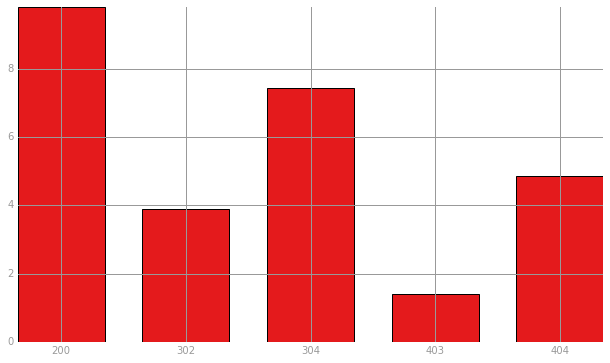

In [26]:
log_status_to_count_df = status_to_count_df.withColumn('log(count)', sqlFunctions.log(status_to_count_df['count']))

from spark_notebook_helpers import prepareSubplot, np, plt, cm
%matplotlib inline
import matplotlib

data = log_status_to_count_df.drop('count').collect()
x, y = zip(*data)
index = np.arange(len(x))
bar_width = 0.7
colorMap = 'Set1'
cmap = cm.get_cmap(colorMap)

fig, ax = prepareSubplot(np.arange(0, 6, 1), np.arange(0, 14, 2))
plt.bar(index, y, width=bar_width, color=cmap(0))
plt.xticks(index + bar_width/2.0, x)

<H3>Frequent Hosts</H3>

In [27]:
# Any hosts that has accessed the server more than 10 times.
host_sum_df =(logs_df
              .groupBy('host')
              .count())

host_more_than_10_df = (host_sum_df
                        .filter(host_sum_df['count'] > 10)
                        .select(host_sum_df['host']))

print 'Any 20 hosts that have accessed more then 10 times:\n'
host_more_than_10_df.show(truncate=False)

Any 20 hosts that have accessed more then 10 times:

+-------------------------+
|host                     |
+-------------------------+
|amdext.amd.com           |
|orpheus.amdahl.com       |
|gw1.att.com              |
|poppy.hensa.ac.uk        |
|n1031729.ksc.nasa.gov    |
|n1131455.ksc.nasa.gov    |
|pl01265.ksc.nasa.gov     |
|derec                    |
|www-b5.proxy.aol.com     |
|www-c5.proxy.aol.com     |
|n1376232.ksc.nasa.gov    |
|www-d1.proxy.aol.com     |
|www-e1f.gnn.com          |
|piweba4y.prodigy.com     |
|www-a1.proxy.aol.com     |
|cliffy.lfwc.lockheed.com |
|piweba5y.prodigy.com     |
|trusty.lmsc.lockheed.com |
|minos.bch.umontreal.ca   |
|gwa.ericsson.com         |
+-------------------------+
only showing top 20 rows



<H3>Visualizing Paths</H3>

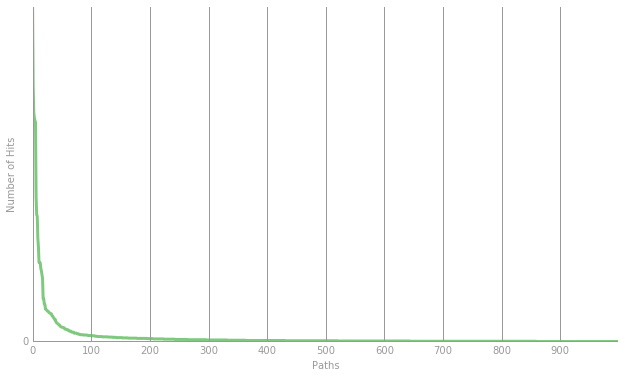

In [28]:
paths_df = (logs_df
            .groupBy('path')
            .count()
            .sort('count', ascending=False))

paths_counts = (paths_df
                .select('path', 'count')
                .map(lambda r: (r[0], r[1]))
                .collect())

paths, counts = zip(*paths_counts)

colorMap = 'Accent'
cmap = cm.get_cmap(colorMap)
index = np.arange(1000)

fig, ax = prepareSubplot(np.arange(0, 1000, 100), np.arange(0, 70000, 10000))
plt.xlabel('Paths')
plt.ylabel('Number of Hits')
plt.plot(index, counts[:1000], color=cmap(0), linewidth=3)
plt.axhline(linewidth=2, color='#999999')

In [29]:
paths_df.show(5)

+--------------------+-----+
|                path|count|
+--------------------+-----+
|/images/NASA-logo...| 1280|
|/images/KSC-logos...|  980|
|/images/MOSAIC-lo...|  876|
|/images/ksclogo-m...|  857|
|/images/USA-logos...|  846|
+--------------------+-----+
only showing top 5 rows



<H3>Top Paths</H3>

In [30]:
print 'Top Ten Paths:'
paths_df.show(n=10, truncate=False)

Top Ten Paths:
+---------------------------------------+-----+
|path                                   |count|
+---------------------------------------+-----+
|/images/NASA-logosmall.gif             |1280 |
|/images/KSC-logosmall.gif              |980  |
|/images/MOSAIC-logosmall.gif           |876  |
|/images/ksclogo-medium.gif             |857  |
|/images/USA-logosmall.gif              |846  |
|/images/WORLD-logosmall.gif            |840  |
|/ksc.html                              |553  |
|/images/launch-logo.gif                |486  |
|/history/apollo/images/apollo-logo1.gif|480  |
|/                                      |395  |
+---------------------------------------+-----+
only showing top 10 rows



<H3>Analyzing Web Server Log File</H3>

<H3>What are the top ten paths which did not have return code 200?</H3>

In [31]:
from pyspark.sql.functions import desc

not200DF = logs_df.filter(logs_df['status'] != 200)
not200DF.show(10)

+--------------------+--------------------+------+------------+--------------------+
|                host|                path|status|content_size|                time|
+--------------------+--------------------+------+------------+--------------------+
|      138.13.97.125 |     /elv/struct.gif|   304|           0|1995-08-24 18:19:...|
|slmel1p63.ozemail...|     /images/faq.gif|   304|           0|1995-08-01 04:50:...|
|ix-col3-25.ix.net...|/software/winvn/w...|   304|           0|1995-08-28 20:17:...|
|ftp.mel.aone.net.au |/pub/winvn/readme...|   404|           0|1995-08-16 07:41:...|
|        gw1.att.com |/shuttle/missions...|   304|           0|1995-08-16 16:20:...|
|www-d3.proxy.aol....|/images/KSC-logos...|   304|           0|1995-08-20 01:35:...|
|     163.205.156.16 |/elv/TITAN/titan.gif|   304|           0|1995-08-28 08:55:...|
|      khan.ossi.com |/images/KSC-logos...|   304|           0|1995-08-27 22:02:...|
|        141.42.25.1 |/shuttle/missions...|   304|           0|19

In [32]:
logs_sum_df = not200DF.groupBy('path').count().sort('count', ascending=False).cache()
logs_sum_df.show(10, False)

+----------------------------------------+-----+
|path                                    |count|
+----------------------------------------+-----+
|/images/NASA-logosmall.gif              |250  |
|/images/KSC-logosmall.gif               |137  |
|/images/WORLD-logosmall.gif             |126  |
|/images/MOSAIC-logosmall.gif            |120  |
|/images/USA-logosmall.gif               |105  |
|/images/ksclogo-medium.gif              |103  |
|/images/launch-logo.gif                 |54   |
|/shuttle/countdown/images/countclock.gif|52   |
|/history/apollo/images/apollo-logo1.gif |52   |
|/                                       |48   |
+----------------------------------------+-----+
only showing top 10 rows



<H3>Number of unique hosts in the entire dataset</H3>

In [33]:
unique_host_count = logs_df.select(logs_df.host).distinct().count()
print 'Unique hosts: {0}'.format(unique_host_count)

Unique hosts: 12770


<H3>Number of unique daily hosts</H3>

In [34]:
from pyspark.sql.functions import dayofmonth

day_to_host_pair_df = logs_df.select('host',dayofmonth('time').alias('day'))
day_group_hosts_df = day_to_host_pair_df.distinct().select('*')
daily_hosts_df = day_group_hosts_df.groupBy('day').count().cache()
daily_hosts_df.show(30, False)

+---+-----+
|day|count|
+---+-----+
|31 |881  |
|1  |352  |
|3  |451  |
|4  |661  |
|5  |332  |
|6  |329  |
|7  |612  |
|8  |620  |
|9  |604  |
|10 |606  |
|11 |619  |
|12 |388  |
|13 |369  |
|14 |629  |
|15 |603  |
|16 |598  |
|17 |632  |
|18 |592  |
|19 |322  |
|20 |339  |
|21 |601  |
|22 |614  |
|23 |595  |
|24 |573  |
|25 |553  |
|26 |362  |
|27 |336  |
|28 |557  |
|29 |715  |
|30 |796  |
+---+-----+



<H3>Visualizing the Number of Unique Daily Hosts</H3>

In [35]:
days_with_hosts = []
hosts = []
for row in daily_hosts_df.rdd.collect():
    days_with_hosts.append(row[0])
    hosts.append(row[1])

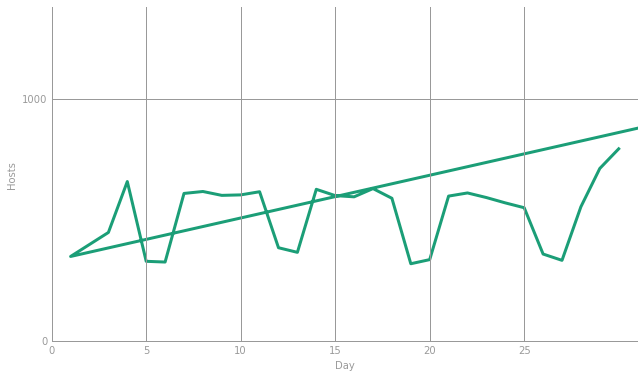

In [36]:
fig, ax = prepareSubplot(np.arange(0, 30, 5), np.arange(0, 5000, 1000))
colorMap = 'Dark2'
cmap = cm.get_cmap(colorMap)
plt.plot(days_with_hosts, hosts, color=cmap(0), linewidth=3)
plt.axis([0, max(days_with_hosts), 0, max(hosts)+500])
plt.xlabel('Day')
plt.ylabel('Hosts')
plt.axhline(linewidth=3, color='#999999')
plt.axvline(linewidth=2, color='#999999')

<H3>Average Number of Daily Requests per Host</H3>

In [37]:
total_req_per_day_df = logs_df.groupBy(dayofmonth('time').alias('day')).count()

In [38]:
new_df = total_req_per_day_df.withColumnRenamed('count','requests').join(daily_hosts_df, 
                                                                         total_req_per_day_df.day == daily_hosts_df.day,
                                                                        'inner').drop(daily_hosts_df.day)
new_list1 = []

for row in new_df.rdd.collect():
    a = row[0]
    b = row[1] / row[2]
    c = (a,b)
    new_list1.append(c)
    
avg_daily_req_per_host_df = sqlContext.createDataFrame(new_list1,['day', 'avg_reqs_per_host_per_day']).cache()
avg_daily_req_per_host_df.show()

+---+-------------------------+
|day|avg_reqs_per_host_per_day|
+---+-------------------------+
| 31|                        1|
|  1|                        1|
|  3|                        1|
|  4|                        1|
|  5|                        1|
|  6|                        1|
|  7|                        1|
|  8|                        1|
|  9|                        1|
| 10|                        1|
| 11|                        1|
| 12|                        1|
| 13|                        1|
| 14|                        1|
| 15|                        1|
| 16|                        1|
| 17|                        1|
| 18|                        1|
| 19|                        1|
| 20|                        1|
+---+-------------------------+
only showing top 20 rows



<H3>Visualizing the Average Daily Requests per Unique Host</H3>

In [39]:
days_with_avg = []
avgs = []
for row in avg_daily_req_per_host_df.rdd.collect():
    days_with_avg.append(row[0])
    avgs.append(row[1])
    
print days_with_avg
print avgs

[31, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


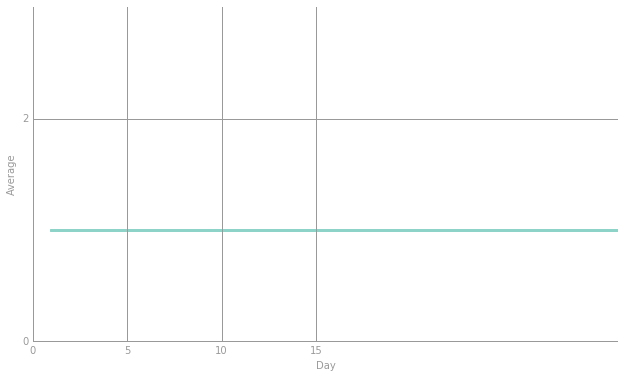

In [40]:
fig, ax = prepareSubplot(np.arange(0, 20, 5), np.arange(0, 16, 2))
colorMap = 'Set3'
cmap = cm.get_cmap(colorMap)
plt.plot(days_with_avg, avgs, color=cmap(0), linewidth=3)
plt.axis([0, max(days_with_avg), 0, max(avgs)+2])
plt.xlabel('Day')
plt.ylabel('Average')
plt.axhline(linewidth=3, color='#999999')
plt.axvline(linewidth=2, color='#999999')   

<H3>Counting 404 Response Codes</H3>

In [43]:
not_found_df = logs_df.filter(logs_df['status'] == 404).cache()
print('Found {0} 404 URLs').format(not_found_df.count())

Found 127 404 URLs


<H3>Listing 404 Status Code Records</H3>

In [44]:
not_found_paths_df = not_found_df.select('path')
unique_not_found_paths_df = not_found_paths_df.distinct()

print '404 URLS:\n'
unique_not_found_paths_df.show(n=40, truncate=False)

404 URLS:

+-----------------------------------------------------------------+
|path                                                             |
+-----------------------------------------------------------------+
|/history/apollo/a-001/movies/                                    |
|/history/apollo/pad-abort-test-1/pad-abort-test-1-patch-small.gif|
|/history/apollo/sa-1/docs/                                       |
|/images/navigation_bar.gif                                       |
|/history/apollo/sa-2/news/                                       |
|/calendar/                                                       |
|/history/apollo/a-001/a-001-patch-small.gif                      |
|/pub                                                             |
|/history/apollo/pad-abort-test-2/movies/                         |
|/shuttle/missions/sts-68/ksc-upclose.gif                         |
|/shuttle/technology/images/sts-comm-small.gif                    |
|/home/mutual/twntyth/twntyth.htm    

<H3>Listing the Top Twenty 404 Response Code paths</H3>

In [46]:
top_20_not_found_df = not_found_paths_df.groupBy('path').count().sort('count', ascending = False)

print 'Top Twenty 404 URLs:\n'
top_20_not_found_df.show(n=20, truncate=False)

Top Twenty 404 URLs:

+-----------------------------------------------------------------+-----+
|path                                                             |count|
+-----------------------------------------------------------------+-----+
|/pub/winvn/readme.txt                                            |18   |
|/shuttle/missions/STS-69/mission-STS-69.html                     |11   |
|/pub/winvn/release.txt                                           |8    |
|/shuttle/missions/sts-68/ksc-upclose.gif                         |7    |
|/images/nasa-logo.gif                                            |4    |
|/://spacelink.msfc.nasa.gov                                      |4    |
|/elv/DELTA/uncons.htm                                            |3    |
|/history/apollo/images/little-joe.jpg                            |3    |
|                                                                 |3    |
|/images/lf-logo.gif                                              |3    |
|/shuttle/countd

<H3>Listing the Top Twenty-five 404 Response Code Hosts</H3>

In [47]:
hosts_404_count_df = not_found_df.groupBy('host').count().sort('count', ascending = False)

print 'Top 25 hosts that generated errors:\n'
hosts_404_count_df.show(n=25, truncate=False)

Top 25 hosts that generated errors:

+----------------------------+-----+
|host                        |count|
+----------------------------+-----+
|gate.barr.com               |3    |
|155.148.25.4                |3    |
|van02060.direct.ca          |2    |
|www-e1f.gnn.com             |2    |
|ix-sac5-07.ix.netcom.com    |2    |
|gw1.att.com                 |1    |
|ppp_port3.xenologics.com    |1    |
|msp1-16.nas.mr.net          |1    |
|147.150.193.92              |1    |
|193.62.104.204              |1    |
|sea-ts1-p11.wolfe.net       |1    |
|204.30.14.10                |1    |
|nexus.mlckew.edu.au         |1    |
|ng.wgir.com                 |1    |
|204.32.199.49               |1    |
|pppa027.compuserve.com      |1    |
|128.159.122.101             |1    |
|admi02.droit.ulg.ac.be      |1    |
|crl5.crl.com                |1    |
|ix-smx-ca1-04.ix.netcom.com |1    |
|rmcg.cts.com                |1    |
|198.213.130.253             |1    |
|port13.annex1.naples.net    |1    |
|

<H3>Listing 404 Errors per Day</H3>

In [48]:
errors_by_date_sorted_df = not_found_df.groupBy(dayofmonth('time').alias('day')).count().cache()

print '404 Errors by day:\n'
errors_by_date_sorted_df.show()

404 Errors by day:

+---+-----+
|day|count|
+---+-----+
| 31|    7|
|  1|    3|
|  3|    4|
|  4|    2|
|  5|    1|
|  6|    4|
|  7|   11|
|  8|    5|
|  9|    4|
| 10|    4|
| 11|    1|
| 13|    4|
| 14|    6|
| 15|    2|
| 16|    6|
| 17|    4|
| 18|    5|
| 19|    4|
| 20|    5|
| 21|    7|
+---+-----+
only showing top 20 rows



<H3>Visualizing the 404 Errors by Day</H3>

In [50]:
days_with_errors_404 = []
errors_404_by_day = []

for row in errors_by_date_sorted_df.rdd.collect():
    days_with_errors_404.append(row[0])
    errors_404_by_day.append(row[1])
  

print days_with_errors_404
print errors_404_by_day

[31, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30]
[7, 3, 4, 2, 1, 4, 11, 5, 4, 4, 1, 4, 6, 2, 6, 4, 5, 4, 5, 7, 1, 10, 4, 2, 5, 5, 5, 6]


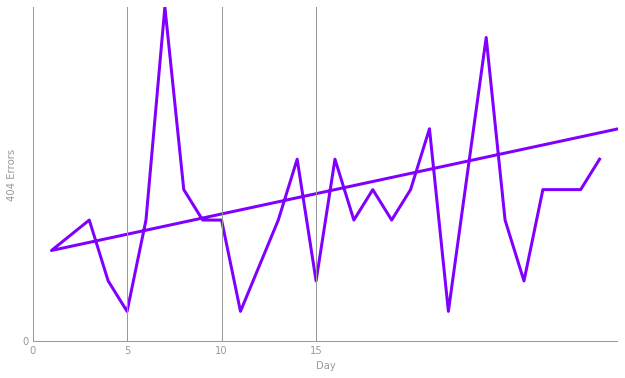

In [52]:
fig, ax = prepareSubplot(np.arange(0, 20, 5), np.arange(0, 600, 100))
colorMap = 'rainbow'
cmap = cm.get_cmap(colorMap)
plt.plot(days_with_errors_404, errors_404_by_day, color=cmap(0), linewidth=3)
plt.axis([0, max(days_with_errors_404), 0, max(errors_404_by_day)])
plt.xlabel('Day')
plt.ylabel('404 Errors')
plt.axhline(linewidth=3, color='#999999')
plt.axvline(linewidth=2, color='#999999')

<H3>Top Five Days for 404 Errors</H3>

In [54]:
top_err_date_df = errors_by_date_sorted_df.sort('count', ascending = False)

print 'Top Five Dates for 404 Requests:\n'
top_err_date_df.show(5)

Top Five Dates for 404 Requests:

+---+-----+
|day|count|
+---+-----+
|  7|   11|
| 24|   10|
| 21|    7|
| 31|    7|
| 16|    6|
+---+-----+
only showing top 5 rows



<H3>Hourly 404 Errors</H3>

In [56]:
from pyspark.sql.functions import hour
hour_records_sorted_df = not_found_df.groupBy(hour('time').alias('hour')).count().cache()

print 'Top hours for 404 requests:\n'
hour_records_sorted_df.show(24)

Top hours for 404 requests:

+----+-----+
|hour|count|
+----+-----+
|   0|    2|
|   1|    1|
|   2|    6|
|   3|    8|
|   4|    5|
|   5|    3|
|   7|    2|
|   8|    3|
|   9|    5|
|  10|    9|
|  11|    4|
|  12|   12|
|  13|    7|
|  14|    8|
|  15|   10|
|  16|    7|
|  17|    2|
|  18|    5|
|  19|    7|
|  20|    7|
|  21|    5|
|  22|    5|
|  23|    4|
+----+-----+



<H3>Visualizing the 404 Response Codes by Hour</H3>

In [57]:
hours_with_not_found = []
not_found_counts_per_hour = []

for row in hour_records_sorted_df.rdd.collect():
  hours_with_not_found.append(row[0])
  not_found_counts_per_hour.append(row[1])

print hours_with_not_found
print not_found_counts_per_hour

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[2, 1, 6, 8, 5, 3, 2, 3, 5, 9, 4, 12, 7, 8, 10, 7, 2, 5, 7, 7, 5, 5, 4]


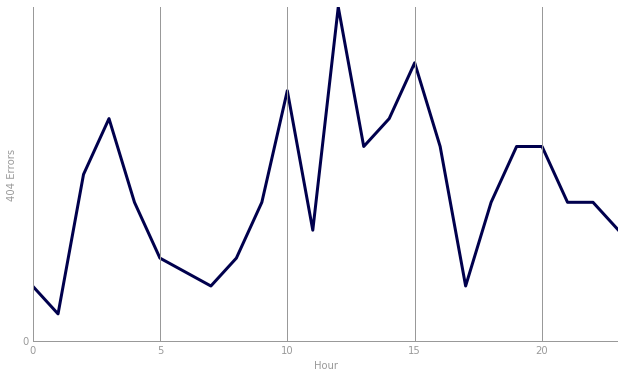

In [59]:
fig, ax = prepareSubplot(np.arange(0, 25, 5), np.arange(0, 500, 50))
colorMap = 'seismic'
cmap = cm.get_cmap(colorMap)
plt.plot(hours_with_not_found, not_found_counts_per_hour, color=cmap(0), linewidth=3)
plt.axis([0, max(hours_with_not_found), 0, max(not_found_counts_per_hour)])
plt.xlabel('Hour')
plt.ylabel('404 Errors')
plt.axhline(linewidth=3, color='#999999')
plt.axvline(linewidth=2, color='#999999')